In [1]:
#import librairies
import numpy as np
import datetime as dt
from pandas_datareader import data as pdr
import yfinance as yf
import pandas as pd
from scipy.optimize import minimize
import seaborn as sns
import matplotlib.pyplot as plt

#import data function from YahooFinance
def getData(stocks, start, end):
    data = yf.download(stocks, start=start, end=end)
    data = data['Close']
    return data

#import the data
start_date = dt.datetime(2010,1,1)
end_date = dt.datetime(2024,1,1)
stocks = ['AAPL','MSFT','GOOG']

df = getData(stocks,start_date,end_date)

df.head()

# I imported the data directly from yahooFinance
# if you want the csv file i send it to you but it is not used in this python code.
#df.to_csv(data.csv)


[*********************100%%**********************]  3 of 3 completed


,AAPL,GOOG,MSFT
Date,,,
2010-01-04,7.643214,15.610239,30.950001
2010-01-05,7.656429,15.541497,30.959999
2010-01-06,7.534643,15.149715,30.770000
2010-01-07,7.520714,14.797037,30.450001
2010-01-08,7.570714,14.994298,30.660000


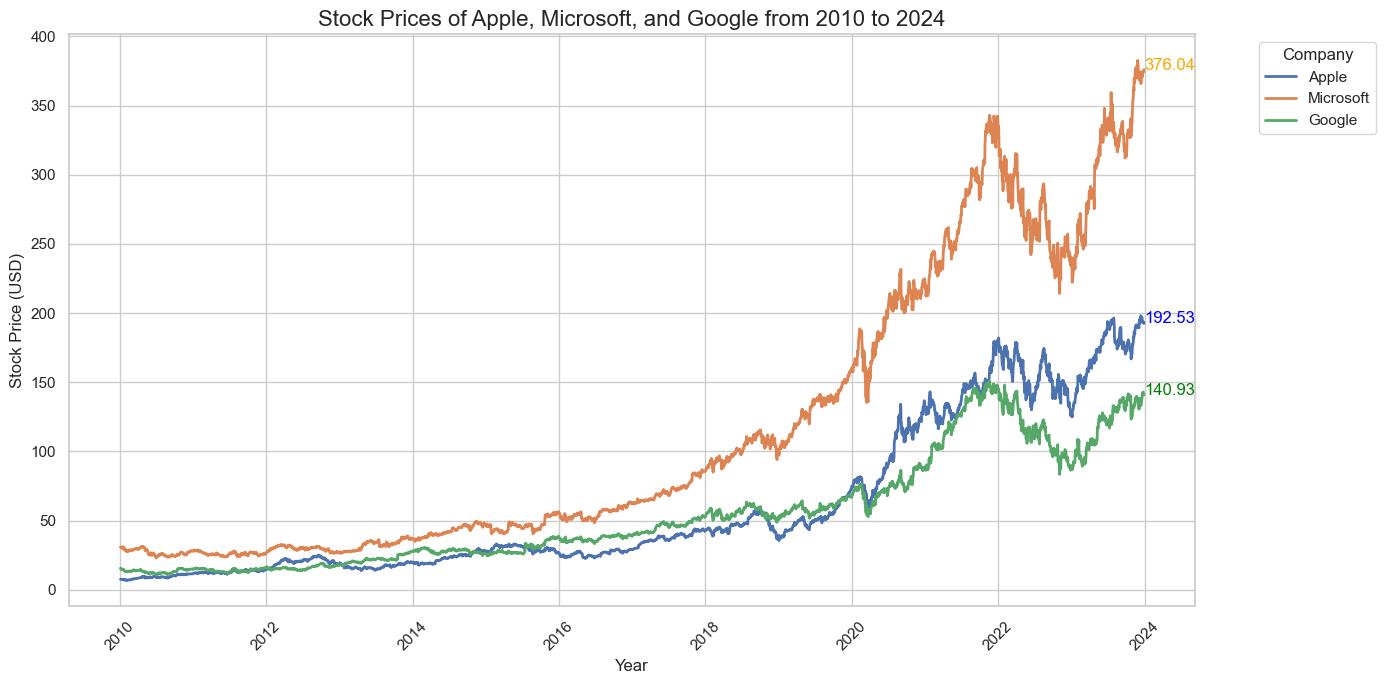

In [2]:
#Plot the time series

sns.set(style='whitegrid')
plt.figure(figsize=(14, 7))
#Rename the columns for the clarity of the graph ploted 
sns.lineplot(data=df['AAPL'], label='Apple', linewidth=2)
sns.lineplot(data=df['MSFT'], label='Microsoft', linewidth=2)
sns.lineplot(data=df['GOOG'], label='Google', linewidth=2)

#Show the last closing Price of the tree stocks
plt.text(x=df.index[-1], y=df['AAPL'].iloc[-1], s=f"{df['AAPL'].iloc[-1]:.2f}", color='blue', horizontalalignment='left')
plt.text(x=df.index[-1], y=df['MSFT'].iloc[-1], s=f"{df['MSFT'].iloc[-1]:.2f}", color='orange', horizontalalignment='left')
plt.text(x=df.index[-1], y=df['GOOG'].iloc[-1], s=f"{df['GOOG'].iloc[-1]:.2f}", color='green', horizontalalignment='left')

plt.title('Stock Prices of Apple, Microsoft, and Google from 2010 to 2024', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Stock Price (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Company', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

#plt.savefig('C:\\Users\\ludos\\Pictures\\amazoN\\NEOMACANDIDATURE\\Alternance\\python\\Dataviz Project\\timeseries.png')
plt.show()

In [3]:
#Compute the daily returns
def returns(data):
    returns = data.pct_change()
    returns = returns.dropna()
    return returns

daily_returns = returns(df)

print(daily_returns)

                AAPL      GOOG      MSFT
Date                                    
2010-01-05  0.001729 -0.004404  0.000323
2010-01-06 -0.015906 -0.025209 -0.006137
2010-01-07 -0.001849 -0.023280 -0.010400
2010-01-08  0.006648  0.013331  0.006897
2010-01-11 -0.008821 -0.001512 -0.012720
...              ...       ...       ...
2023-12-22 -0.005547  0.006488  0.002784
2023-12-26 -0.002841  0.000701  0.000214
2023-12-27  0.000518 -0.009663 -0.001575
2023-12-28  0.002226 -0.001131  0.003235
2023-12-29 -0.005424 -0.002477  0.002025

[3521 rows x 3 columns]


In [4]:
#Replace the tickers by the name of the companies

# Replace Each Tickers one by one with the Pandas fuction replace
daily_returns.columns = daily_returns.columns.str.replace('AAPL', 'Apple')
daily_returns.columns = daily_returns.columns.str.replace('GOOG', 'Google')
daily_returns.columns = daily_returns.columns.str.replace('MSFT', 'Microsoft')
print(daily_returns)


               Apple    Google  Microsoft
Date                                     
2010-01-05  0.001729 -0.004404   0.000323
2010-01-06 -0.015906 -0.025209  -0.006137
2010-01-07 -0.001849 -0.023280  -0.010400
2010-01-08  0.006648  0.013331   0.006897
2010-01-11 -0.008821 -0.001512  -0.012720
...              ...       ...        ...
2023-12-22 -0.005547  0.006488   0.002784
2023-12-26 -0.002841  0.000701   0.000214
2023-12-27  0.000518 -0.009663  -0.001575
2023-12-28  0.002226 -0.001131   0.003235
2023-12-29 -0.005424 -0.002477   0.002025

[3521 rows x 3 columns]


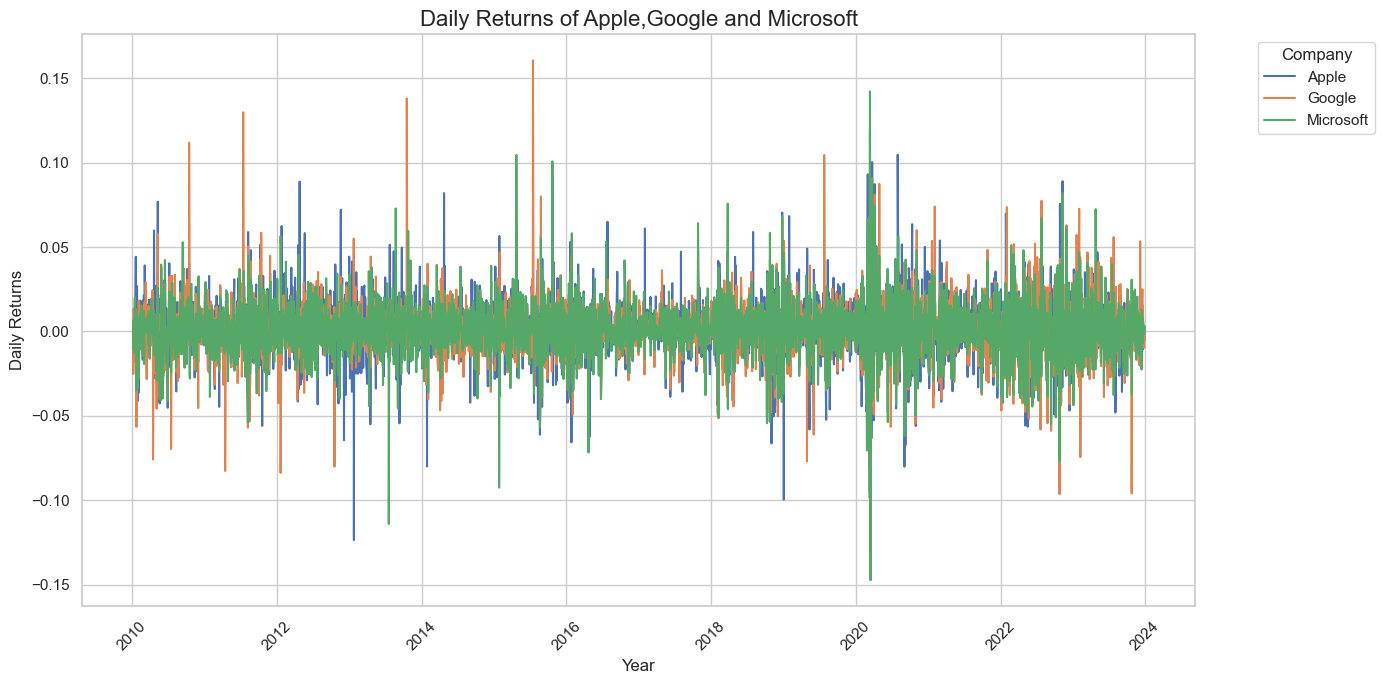

In [5]:
#Plot the return
sns.set(style="whitegrid")

plt.figure(figsize=(14, 7))

for column in daily_returns.columns:
    plt.plot(daily_returns.index, daily_returns[column], label=column)
    
plt.title('Daily Returns of Apple,Google and Microsoft',fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.xticks(rotation=45)
plt.ylabel('Daily Returns')
plt.legend(title='Company', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
#plt.savefig('C:\\Users\\ludos\\Pictures\\amazoN\\NEOMACANDIDATURE\\Alternance\\python\\Dataviz Project\\returns.png')
plt.show()

In [6]:
def metrics(returns):   
    mean_returns = returns.mean()
    Stdev = returns.std()
    CovMatrix = returns.cov()
    # Return a dictionary to have a better visibility when we execute the function
    return {
        'mean_returns': mean_returns,
        'Stdev': Stdev,
        'CovMatrix': CovMatrix
    }

stock_characteristics = metrics(daily_returns)
print("Mean Returns:")
print(stock_characteristics['mean_returns'])
print("\nStandard Deviation of Returns:")
print(stock_characteristics['Stdev'])
print("\nCovariance Matrix of Returns:")
print(stock_characteristics['CovMatrix'])

Mean Returns:
Apple        0.001075
Google       0.000773
Microsoft    0.000843
dtype: float64

Standard Deviation of Returns:
Apple        0.017774
Google       0.017214
Microsoft    0.016351
dtype: float64

Covariance Matrix of Returns:
              Apple    Google  Microsoft
Apple      0.000316  0.000171   0.000172
Google     0.000171  0.000296   0.000180
Microsoft  0.000172  0.000180   0.000267


# Vizualisation of the Covariance Matrix

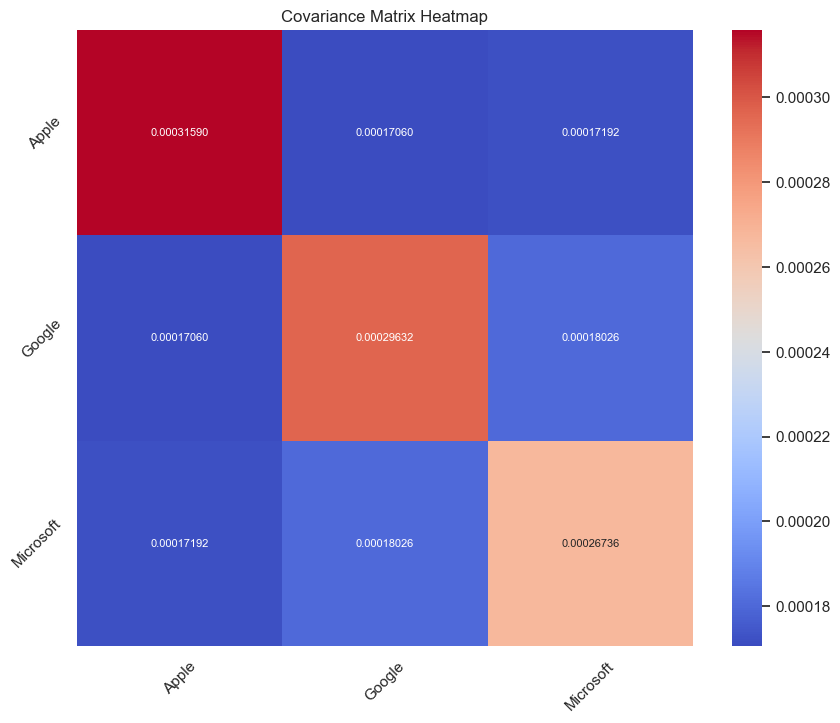

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_covariance_matrix(cov_matrix):
    # Setting the size of the plot
    plt.figure(figsize=(10,8))
    
    # Creating the heatmap
    sns.heatmap(cov_matrix, annot=True, fmt=".8f", cmap='coolwarm', 
                cbar=True, square=True, annot_kws={'size': 8})
    
    # Adding titles and labels
    plt.title('Covariance Matrix Heatmap')
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.show()
    

cov_matrix = stock_characteristics['CovMatrix']
# Plotting the covariance matrix
plot_covariance_matrix(cov_matrix)


In [8]:
#GENERATE RANDOM PORTFOLIOS 
def generate_portfolios(returns, num_portfolios=10000):
   # np.random.seed(30)  # For reproducible results
    #create lists
    weights_record = []
    ret_arr = []
    vol_arr = []
    for _ in range(num_portfolios):
        # Generate random weights for the stocks
        weights = np.random.random(len(returns.columns))
        weights /= np.sum(weights)  # Normalize so that sum(weights) = 1
        weights_record.append(weights)
        
        # Expected portfolio return
        expected_return = np.sum(weights * returns.mean()) * 252  # 252 trading days
        ret_arr.append(expected_return)
        
        # Expected portfolio volatility
        vol = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))
        vol_arr.append(vol)
        
    portfolio_data = {'Returns': ret_arr, 'Volatility': vol_arr}
    for counter, symbol in enumerate(returns.columns.tolist()):
        portfolio_data[symbol+' Weight'] = [w[counter] for w in weights_record]
    portfolios = pd.DataFrame(portfolio_data)
    
    return portfolios

# Generate 10000 random portfolios
portfolios = generate_portfolios(daily_returns)

print(portfolios)


       Returns  Volatility  Apple Weight  Google Weight  Microsoft Weight
0     0.215258    0.237800      0.218632       0.561813          0.219555
1     0.218159    0.237179      0.153865       0.185558          0.660577
2     0.244749    0.248310      0.648832       0.315300          0.035868
3     0.231421    0.233089      0.392310       0.222590          0.385100
4     0.220056    0.233175      0.260705       0.429922          0.309373
...        ...         ...           ...            ...               ...
9995  0.213587    0.236149      0.108481       0.293803          0.597716
9996  0.232690    0.235811      0.450797       0.343387          0.205816
9997  0.233135    0.235987      0.382446       0.093655          0.523899
9998  0.208396    0.238233      0.093256       0.536095          0.370649
9999  0.218034    0.244916      0.117565       0.073304          0.809131

[10000 rows x 5 columns]


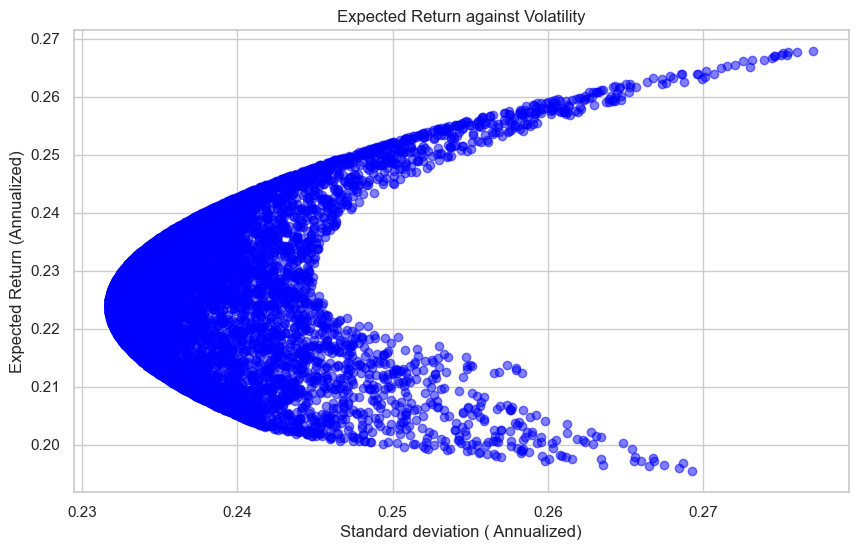

In [9]:
# PLOT ALL THE PORTFOLIOS
plt.figure(figsize=(10, 6))
plt.scatter(portfolios['Volatility'], portfolios['Returns'], c='blue', marker='o', alpha=0.5)
plt.title('Expected Return against Volatility')
plt.xlabel('Standard deviation ( Annualized)')
plt.ylabel('Expected Return (Annualized)')
plt.grid(True)
plt.show()


# SHARPE RATIO

In [10]:

R_f = 0.05

portfolios['Sharpe Ratio'] = (portfolios['Returns'] - R_f) / portfolios['Volatility']

print(portfolios.head()) 


    Returns  Volatility  Apple Weight  Google Weight  Microsoft Weight  \
0  0.215258    0.237800      0.218632       0.561813          0.219555   
1  0.218159    0.237179      0.153865       0.185558          0.660577   
2  0.244749    0.248310      0.648832       0.315300          0.035868   
3  0.231421    0.233089      0.392310       0.222590          0.385100   
4  0.220056    0.233175      0.260705       0.429922          0.309373   

   Sharpe Ratio  
0      0.694944  
1      0.708998  
2      0.784300  
3      0.778333  
4      0.729307  


# portfolio with 1 risky stock

In [11]:
#Only Apple
apple_returns = daily_returns['Apple']
annualized_return_Apple = (daily_returns['Apple'].mean())*252

daily_volatility_Apple = daily_returns['Apple'].std()
annualized_volatility_Apple = daily_volatility_Apple * np.sqrt(252)

print("Apple:")
print("Annualized Return:", annualized_return_Apple)
print("Daily Volatility:", apple_returns.std())
print("Annualized Volatility:", annualized_volatility_Apple)



#only Google
google_returns = daily_returns['Google']
annualized_return_google = google_returns.mean() * 252
annualized_volatility_google = google_returns.std() * np.sqrt(252)

print("\nGoogle:")
print("Annualized Return:", annualized_return_google)
print("Daily Volatility:", google_returns.std())
print("Annualized Volatility:", annualized_volatility_google)



#Only Microsoft

microsoft_returns = daily_returns['Microsoft']
annualized_return_microsoft = microsoft_returns.mean() * 252
annualized_volatility_microsoft = microsoft_returns.std() * np.sqrt(252)

print("\nMicrosoft:")
print("Annualized Return:", annualized_return_microsoft)
print("Daily Volatility:", microsoft_returns.std())
print("Annualized Volatility:", annualized_volatility_microsoft)






Apple:
Annualized Return: 0.2708486424122168
Daily Volatility: 0.017773680420898937
Annualized Volatility: 0.28214842965621845

Google:
Annualized Return: 0.1947132720522607
Daily Volatility: 0.017213901029627356
Annualized Volatility: 0.2732622073060361

Microsoft:
Annualized Return: 0.212472554169238
Daily Volatility: 0.016351272854261727
Annualized Volatility: 0.2595684095504269


# Minimum Variance Portfolio (Using scipy)


In [12]:
# Calculation of stock characteristics
stock_characteristics = metrics(daily_returns)
mean_returns = stock_characteristics['mean_returns']
cov_matrix = stock_characteristics['CovMatrix']

# Function to calculate portfolio return
def portfolio_return(weights):
    return np.sum(mean_returns * weights) * 252

# Function to calculate portfolio volatility
def portfolio_volatility(weights, cov_matrix):
    return np.sqrt(np.dot(weights.T, np.dot(cov_matrix * 252, weights)))

# Objective function: portfolio variance
def min_variance_objective(weights, cov_matrix):
    return portfolio_volatility(weights, cov_matrix)**2

# Constraint: sum of weights should be equal to 1
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})

# Bounds: each weight should be between 0 and 1
bounds = tuple((0, 1) for _ in range(len(mean_returns)))

# Initial point: equally distributed weights
initial_weights = np.array(len(mean_returns) * [1. / len(mean_returns)])

# Optimization to find the minimum variance portfolio
result = minimize(min_variance_objective, initial_weights, args=(cov_matrix,), method='SLSQP', bounds=bounds, constraints=constraints)
min_var_weights = result.x
min_var_volatility = portfolio_volatility(min_var_weights, cov_matrix)
min_var_return = portfolio_return(min_var_weights)
    
print("Minimum Variance Portfolio:")
print("Weights:", min_var_weights)
print("Volatility (annual standard deviation):", min_var_volatility)
print("Expected Annual Return:", min_var_return)



Minimum Variance Portfolio:
Weights: [0.28361074 0.31562939 0.40075987]
Volatility (annual standard deviation): 0.23173344343406438
Expected Annual Return: 0.2234232886447325


# Optimal Risky Portfolio (Using Scipy)

In [13]:
risk_free_rate = (0.05/252)  # Annualized risk free rate


def portfolio_return(weights):
    return np.dot(weights, mean_returns) * 252

def portfolio_volatility(weights):
    return np.sqrt(np.dot(weights.T, np.dot(cov_matrix * 252, weights)))

# Objective fonction (Negative Sharpe Ratio)
def neg_sharpe_ratio(weights):
    p_ret = portfolio_return(weights)
    p_vol = portfolio_volatility(weights)
    return -(p_ret - risk_free_rate ) / p_vol

# Constraint: sum of weights should be equal to 1
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})
# Bounds: each weight should be between 0 and 1
bounds = tuple((0, 1) for asset in range(len(mean_returns)))

# Initial point: equally distributed weights
initial_weights = np.ones(len(mean_returns)) / len(mean_returns)

# Optimization function to find the Optimal Risky Portfolio
opt_result = minimize(neg_sharpe_ratio, initial_weights, method='SLSQP', bounds=bounds, constraints=constraints)


optimal_weights = opt_result.x
optimal_return = portfolio_return(optimal_weights)
optimal_volatility = portfolio_volatility(optimal_weights)
optimal_sharpe_ratio = -neg_sharpe_ratio(optimal_weights)
    
print("Optimal Risky Portfolio:")
print("Optimal Risky Portfolio Weights:", optimal_weights)
print("Volatility (annual standard deviation):", optimal_volatility)
print("Expected Annual Return:", optimal_return)
print("Sharpe Ratio:", optimal_sharpe_ratio)


Optimal Risky Portfolio:
Optimal Risky Portfolio Weights: [0.59790004 0.09302147 0.30907848]
Volatility (annual standard deviation): 0.24279126228249537
Expected Annual Return: 0.24572362531291303
Sharpe Ratio: 1.0112604972118968


# PIE CHART

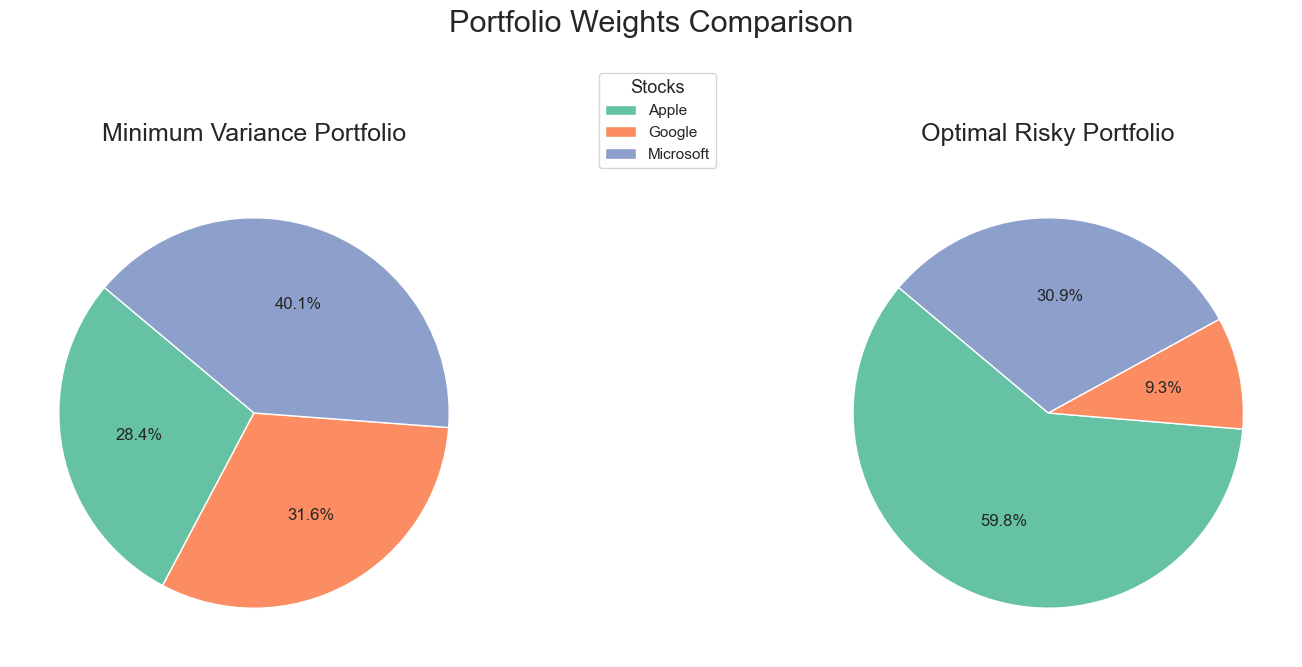

In [14]:
#PIE CHART
stock_names = ['Apple', 'Google', 'Microsoft']  
#colors = ['LightBlue', 'Green', 'Orange']
colors = plt.get_cmap('Set2').colors
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Min-Variance
axs[0].pie(min_var_weights, colors=colors, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Minimum Variance Portfolio', size=18, pad=20)

#Optimal (Tangency)
axs[1].pie(optimal_weights, colors=colors, autopct='%1.1f%%', startangle=140)
axs[1].set_title('Optimal Risky Portfolio', size=18, pad=20)


plt.legend(stock_names, title="Stocks", title_fontsize='13', loc="center", bbox_to_anchor=(-0.3, 1.1))
plt.suptitle('Portfolio Weights Comparison', size=22)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

#plt.savefig('C:\\Users\\ludos\\Pictures\\amazoN\\NEOMACANDIDATURE\\Alternance\\python\\Dataviz Project\\piechart.png')
plt.show()


# Plot of all the portfolios with the efficient frontier

C:\Users\ludos\AppData\Local\Temp\ipykernel_11512\1631704868.py:54: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


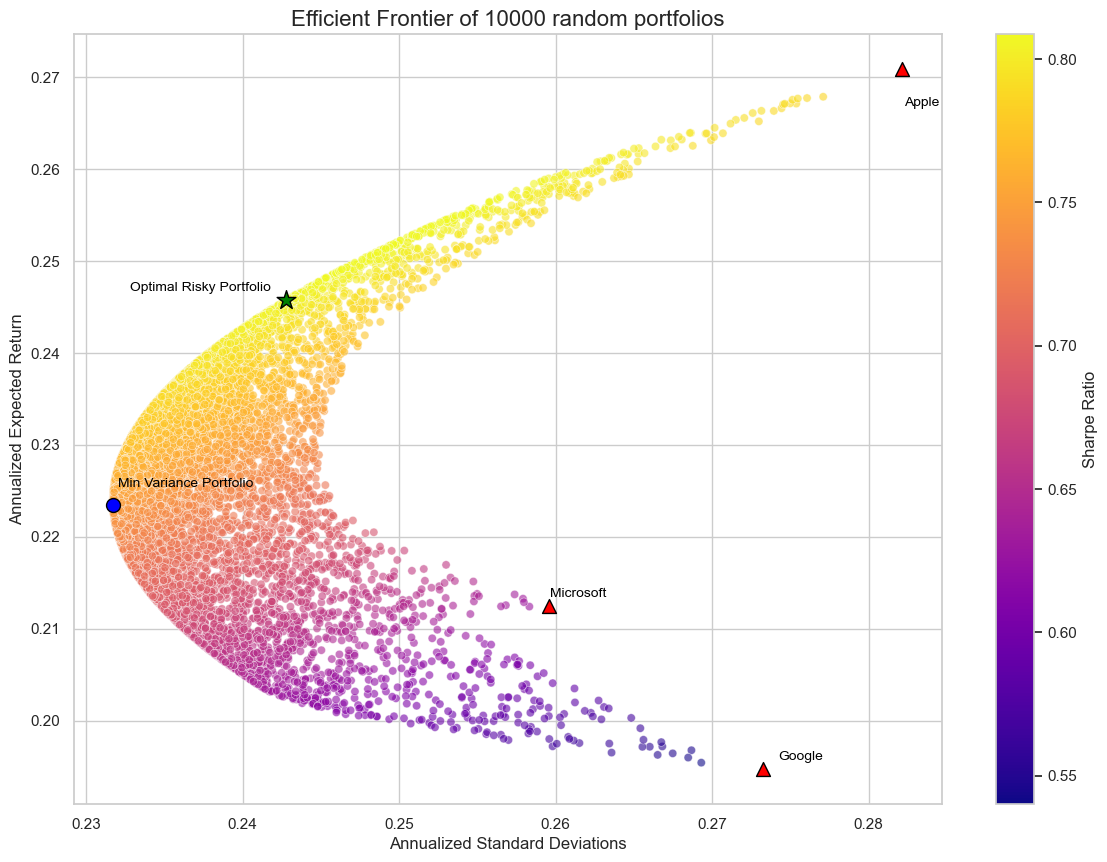

In [15]:
# FINAL PLOTTING 

# Plot of random portfolios
plt.figure(figsize=(14, 10))
scatter = sns.scatterplot(data=portfolios, x='Volatility', y='Returns', hue='Sharpe Ratio', palette='plasma', alpha=0.6, legend=False)

# Plot of the minimum variance portfolio
plt.scatter(min_var_volatility, min_var_return, color='blue', s=100, edgecolors='black', label='Minimum Variance Portfolio')

#1 stock portfolio
plt.scatter(annualized_volatility_Apple, annualized_return_Apple, color='red', s=100, edgecolors='black',marker='^', label='Apple')
plt.scatter(annualized_volatility_google, annualized_return_google, color='red', s=100, edgecolors='black',marker='^', label='Google')
plt.scatter(annualized_volatility_microsoft, annualized_return_microsoft, color='red', s=100, edgecolors='black',marker='^', label='Microsoft')

#Plot of the optimal Risky Portfolio
plt.scatter(optimal_volatility, optimal_return, color='Green', s=200, edgecolors='black',marker='*', label='Optimal Risky Portfolio')

# Add a label next to the minimum variance portfolio point
x_offset = 0.0003
y_offset = 0.002
plt.text(min_var_volatility + x_offset, min_var_return + y_offset, 'Min Variance Portfolio', color='black', fontsize=10)

# Add a label next to the Apple Portfolio
x_Apple_offset = 0.0001
y_Apple_offset = - 0.004
plt.text(annualized_volatility_Apple + x_Apple_offset, annualized_return_Apple + y_Apple_offset, 'Apple', color='black', fontsize=10)

# Add a label next to the Google Portfolio
x_Google_offset = 0.001
y_Google_offset = 0.001
plt.text(annualized_volatility_google + x_Google_offset, annualized_return_google + y_Google_offset, 'Google', color='black', fontsize=10)

# Add a label next to the Google Portfolio
x_Microsoft_offset = 0.0001
y_Microsoft_offset = 0.001
plt.text(annualized_volatility_microsoft + x_Microsoft_offset, annualized_return_microsoft + y_Microsoft_offset, 'Microsoft', color='black', fontsize=10)

# Add a label next to the optimal risky portfolio

x_Opt_offset = - 0.01
y_Opt_offset = 0.001
plt.text(optimal_volatility + x_Opt_offset, optimal_return + y_Opt_offset, 'Optimal Risky Portfolio', color='black', fontsize=10)


plt.title('Efficient Frontier of 10000 random portfolios',fontsize=16)
plt.xlabel('Annualized Standard Deviations')
plt.ylabel('Annualized Expected Return')


# create color bar for the sharpe ratio measure
norm = plt.Normalize(portfolios['Sharpe Ratio'].min(), portfolios['Sharpe Ratio'].max())
sm = plt.cm.ScalarMappable(cmap="plasma", norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Sharpe Ratio')

#plt.grid(False) #if you want to delete the grid

#plt.legend() # you can add the legend, but this output should be efficient 
#plt.savefig('C:\\Users\\ludos\\Pictures\\amazoN\\NEOMACANDIDATURE\\Alternance\\python\\Dataviz Project\\EfficientFrontier.png')
plt.show()
